In [340]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [417]:
spx = yf.Ticker("SP=F")
gold = yf.Ticker("GC=F")
silver = yf.Ticker("SI=F")

period="5y"

spx_metals = pd.DataFrame({
    "SPX": spx.history(period=period)["Close"],
    "Gold": gold.history(period=period)["Close"],
    "Silver": silver.history(period=period)["Close"],
},
    columns=["SPX", "Gold", "Silver"]
)

# spx_metals = (spx_metals - spx_metals.mean()) / spx_metals.std()
# spx_metals.sort_values(by="Date", ascending=False, inplace=True)

In [418]:
print(spx_metals.corr())

             SPX      Gold    Silver
SPX     1.000000  0.659168  0.075816
Gold    0.659168  1.000000  0.392775
Silver  0.075816  0.392775  1.000000


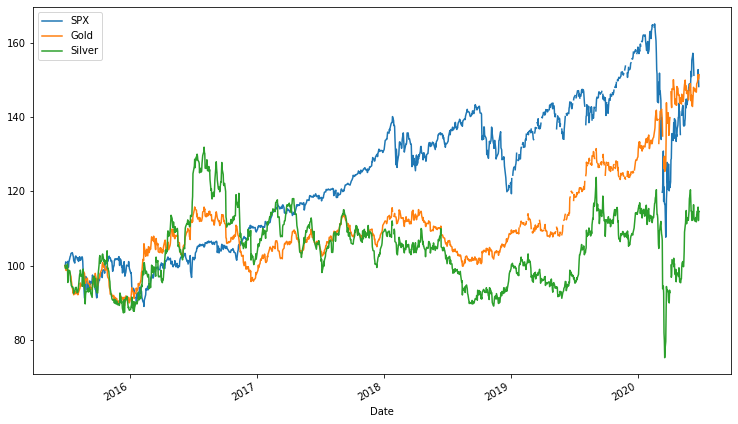

In [419]:
initial = (spx_metals.iloc[0] / 100).to_dict()

spx_metals_rebased = spx_metals / initial

spx_metals_rebased.plot(figsize=(12.5,7.5))

In [420]:
spx_metals_rebased[["SPX_chg", "Gold_chg", "Silver_chg"]] = spx_metals_rebased[["SPX", "Gold", "Silver"]].pct_change()

spx_metals_rebased["SPX_Gold_chg"] = spx_metals_rebased["SPX_chg"] - spx_metals_rebased["Gold_chg"]
spx_metals_rebased["Silver_Gold_chg"] = spx_metals_rebased["Silver_chg"] - spx_metals_rebased["Gold_chg"]


# spx_metals_rebased["SPX_log"] = np.log(spx_metals_rebased["SPX"]) - np.log(spx_metals_rebased["SPX"].shift(1))

spx_metals_rebased.head()

,SPX,Gold,Silver,SPX_chg,Gold_chg,Silver_chg,SPX_Gold_chg,Silver_Gold_chg
Date,,,,,,,,
2015-06-29,100.000000,100.000000,100.000000,NaN,NaN,NaN,NaN,NaN
2015-06-30,100.190198,99.406025,99.278601,0.001902,-0.005940,-0.007214,0.007842,-0.001274
2015-07-01,100.994879,99.193891,99.284985,0.008032,-0.002134,0.000064,0.010166,0.002198
2015-07-02,100.892465,98.684769,99.189224,-0.001014,-0.005133,-0.000965,0.004119,0.004168
2015-07-06,100.687637,99.524820,100.395812,-0.002030,0.008512,0.012165,-0.010543,0.003652


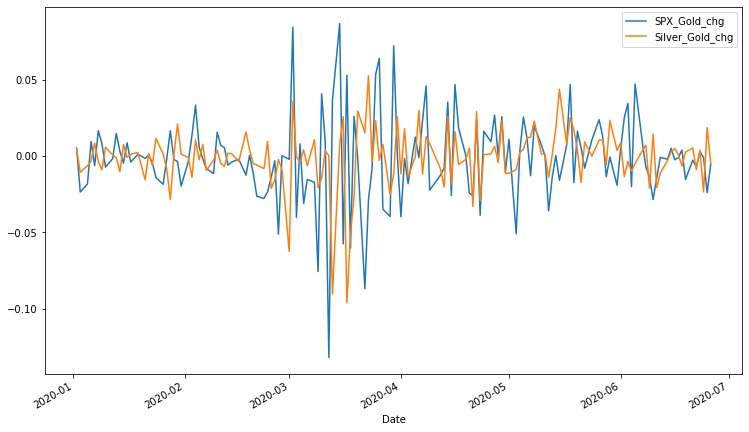

In [421]:
spx_metals_rebased.loc["2020-01-01":, ["SPX_Gold_chg", "Silver_Gold_chg"]].plot(figsize=(12.5,7.5))

In [422]:
spx_metals_rebased.rename(columns={"SPX": "SPX_rebased", "Gold": "Gold_rebased", "Silver": "Silver_rebased"}, inplace=True)
spx_metals = pd.concat([spx_metals, spx_metals_rebased], axis=1)
spx_metals["Gold_Silver_ratio"] = spx_metals["Gold"] / spx_metals["Silver"]
spx_metals["Gold_Silver"]
spx_metals.head()

,SPX,Gold,Silver,SPX_rebased,Gold_rebased,Silver_rebased,SPX_chg,Gold_chg,Silver_chg,SPX_Gold_chg,Silver_Gold_chg
Date,,,,,,,,,,,
2015-06-29,2050.5,1178.5,15.664,100.000000,100.000000,100.000000,NaN,NaN,NaN,NaN,NaN
2015-06-30,2054.4,1171.5,15.551,100.190198,99.406025,99.278601,0.001902,-0.005940,-0.007214,0.007842,-0.001274
2015-07-01,2070.9,1169.0,15.552,100.994879,99.193891,99.284985,0.008032,-0.002134,0.000064,0.010166,0.002198
2015-07-02,2068.8,1163.0,15.537,100.892465,98.684769,99.189224,-0.001014,-0.005133,-0.000965,0.004119,0.004168
2015-07-06,2064.6,1172.9,15.726,100.687637,99.524820,100.395812,-0.002030,0.008512,0.012165,-0.010543,0.003652


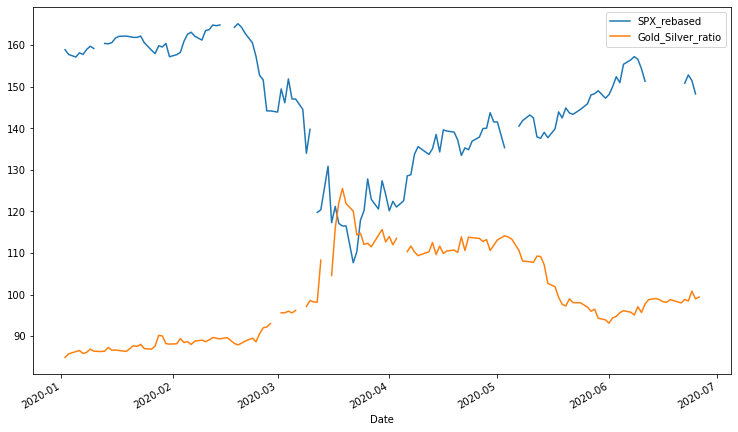

In [430]:
spx_metals.loc["2020-01-01":, ["SPX_rebased", "Gold_Silver_ratio"]].plot(figsize=(12.5, 7.5))

In [433]:
spx_metals[["SPX_chg", "Gold_Silver_ratio_chg"]].corr()

KeyError: "['Gold_Silver_ratio_chg'] not in index"